### Imports

In [96]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

### Zadanie 1

Zaimplementuj generator liniowy kongruentny wg wzoru:
$$X_{i+1}=(aX_i+c)\ mod\ m$$
Generator ma zwracać wartości w zakresie [0...1], wartości startowe wg własnego wyboru. 

Przetestuj jego działanie dla różnych zestawów parametrów:

|     a         |   c           | m         |
| ------------- |:-------------:| ---------:|
|  1103515245   | 12345         |$$2^{32}$$ |
| 1229          | 1             | $$2048$$  |
| 1597          | 51749         | $$24494$$ |
| $2^{16}+3$    | 0             | $ 2^{31}$ |

Zwizualizuj rozkład generowanych liczby (histogram lub lepiej chmura punktów 2-D lub 3D ($X_i, X_{i+1}$), ($X_i, X_{i+1}, X_{i+2}$)). Oceń jakość generowanych rozkładów. 

1) a=1103515245, c=12345, m=2^32
[0.5693245220463723, 0.4305132981389761, 0.6715931261423975, 0.1353465816937387, 0.2576814496424049]


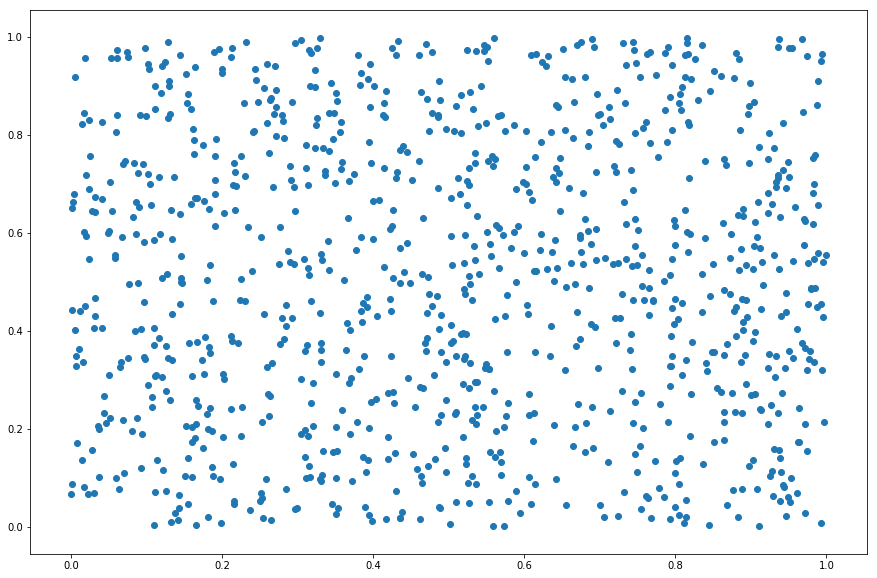

2) a=1229, c=1, m=2048
[0.00146484375, 0.80078125, 0.16064453125, 0.4326171875, 0.68701171875]


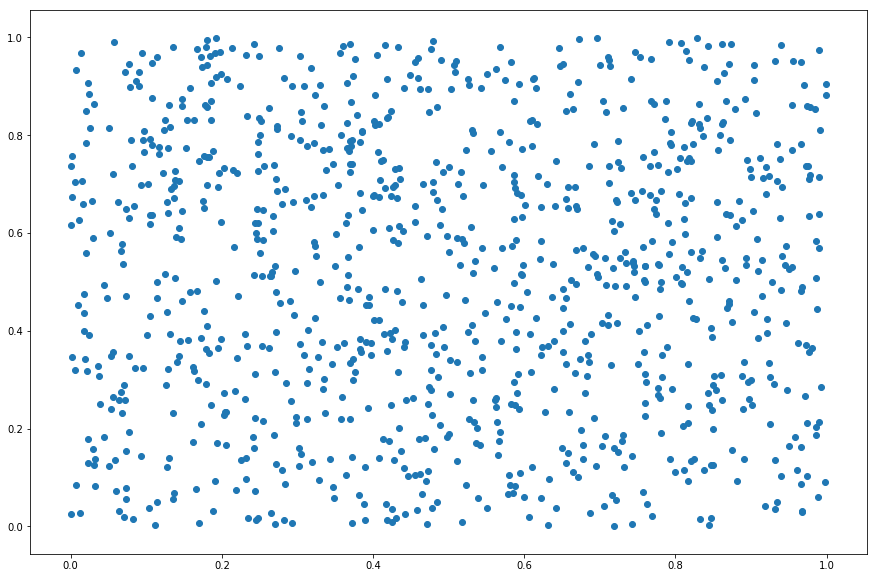

3) a=1597, c=51749, m=24494
[0.7647178900955336, 0.36719196537927656, 0.5182901935167796, 0.8221605291091696, 0.10308647015595657]


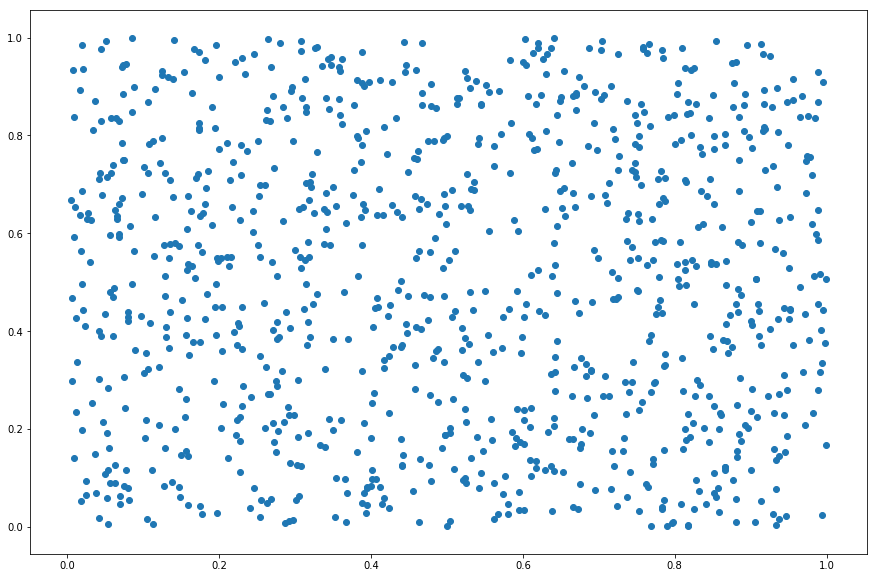

4) a=2^16+3, c=0, m=2^31
[0.00030518975108861923, 0.0018310965970158577, 0.008239871822297573, 0.03295936156064272, 0.12359732296317816]


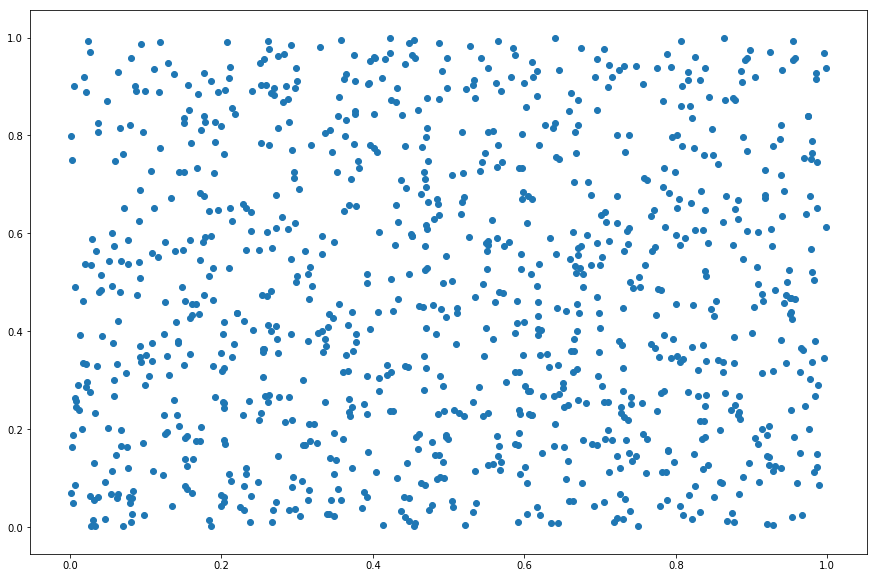

In [97]:
def congruent_linear_generator(a, x, c, m, n):
    res = []
    for _ in range(n):
        x = (a * x + c) % m
        res.append(x / float(m))
    return res


def show_plot(a, x, c, m, n):
    numbers = [random.random() for _ in range(n * 2)]
    x_arr = numbers[:n]
    y_arr = numbers[n:]
    plt.figure(figsize=(15, 10))
    plt.scatter(x_arr, y_arr)
    plt.show()

print('1) a=1103515245, c=12345, m=2^32')
print(congruent_linear_generator(1103515245, 10, 12345, 2**32, 5))
show_plot(1103515245, 10, 12345, 2**32, 1000)

print('2) a=1229, c=1, m=2048')
print(congruent_linear_generator(1229, 10, 1, 2048, 5))
show_plot(1229, 10, 1, 2048, 1000)

print('3) a=1597, c=51749, m=24494')
print(congruent_linear_generator(1597, 10, 51749, 24494, 5))
show_plot(1597, 10, 51749, 24494, 1000)

print('4) a=2^16+3, c=0, m=2^31')
print(congruent_linear_generator(2**16+3, 10, 0, 2**31, 5))
show_plot(2**16+3, 10, 0, 2**31, 1000)

Jak widać z wykresów powyżej, końcowe wartości są generowany w bardziej uporządkowany sposób, więc generowane rozkłady nie są dobre.

### Zadanie 2
Zapoznaj się z generetorem dostępnym w bibliotece numpy. Opisz krótko jaki to generator i jak działa. Przeanalizuj generowany przez niego rozkład podobnie jak w poprzednim zadaniu. 

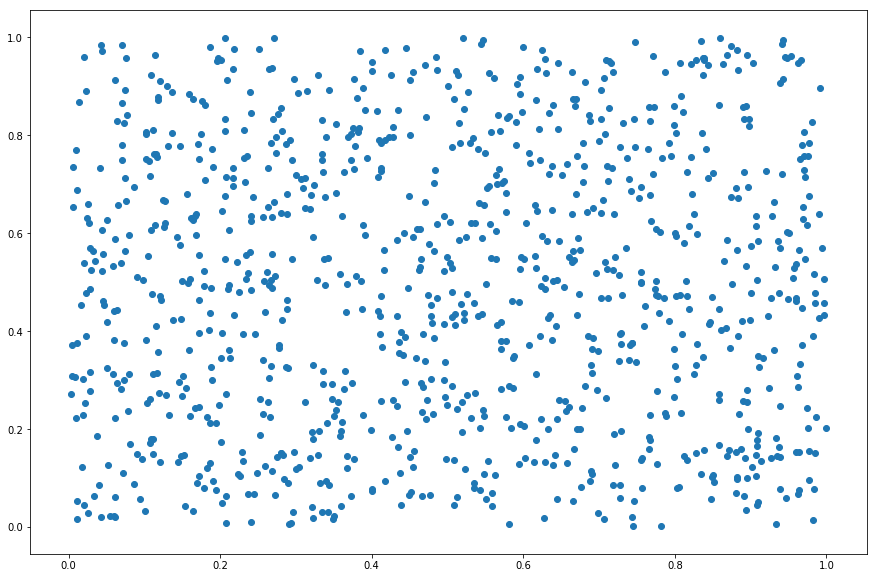

In [98]:
def show_plot_numpy(n):
    numbers = [random.random() for _ in range(n * 2)]
    x_arr = numbers[:n]
    y_arr = numbers[n:]
    plt.figure(figsize=(15, 10))
    plt.scatter(x_arr, y_arr)
    plt.show()

show_plot_numpy(1000)

Wartości generowane poprzez bibliotekę numpy są zdecydowanie bardziej losowe, więc generator z biblioteki numpy jest lepszy.

### Zadanie 3
Zaimplementuj metodą całkowania Monte Carlo i zastosuj ją wobec następujących całek:
$$ \int_1^2 \frac{1}{x^2}\ dx $$
$$ \int_1^6 \frac{1}{\sqrt{x^5+8}}\ dx $$
$$ \int_1^{22} x^2+2x\ dx $$
Oblicz także objętości brył:
- kula o promioniu 5
- stożek o wysokości 10 i promieniu podstawy 10
- bryła będąca różnicą kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3; środek walca pokrywa się z środkiem kuli.

Przeanalizuj jak wybór liczby próbek wpływa na wyniki obliczeń. 

In [99]:
def monte_carlo_integrate(a, b, f, n):
    res = 0
    for _ in range(n):
        res += f(random.uniform(a, b))
    return ((b - a) / float(n) * res)


print("calka1", monte_carlo_integrate(1, 2, lambda x : 1 / (x**2), 10000))
print("calka2", monte_carlo_integrate(1, 6, lambda x: 1 / np.sqrt(x**5+8), 10000))
print("calka3", monte_carlo_integrate(1, 22, lambda x: x**2 + 2*x, 10000))

('calka1', 0.49922660556970644)
('calka2', 0.4391596441581389)
('calka3', 4019.661987927994)


Poszukiwanie objętości bryły będzie polegało na generowaniu punktów losowych oraz sprawdzieniu, czy punkt należy do prostopadłościanu ograniczającego bryłe. 

Mamy wzór:  V1=V2*n/N, gdzie:

    V1 - objętość bryły
    V2 - objętośćprostopadłościanu ograniczjącego bryłe
    N - liczba wylosowanych punktów znajdowanych w prostopadłościanie
    n - liczba wylosowanych punktów znajowanych w bryle

Za pomocą tego wzóra będziemy szukać objętość bryły

In [100]:
def V1(R, N):
    n = 0
    for _ in range(N):
        x, y, z = random.uniform(-R, R), random.uniform(-R, R), random.uniform(-R, R)
        if x ** 2 + y ** 2 + z ** 2 <= R ** 2:
            n += 1
    return ((2 * R) ** 3) * (n / float(N))

print('Kula o promioniu 5', V1(5, 10000))

('Kula o promioniu 5', 531.9000000000001)


In [101]:
def V2(R, H, N):
    n = 0
    for _ in range(N):
        x, y, z = random.uniform(-R, R), random.uniform(-R, R), random.uniform(0, H)
        if x ** 2 + y ** 2 <= ((z * R) / float(H)) ** 2:
            n += 1
    return ((2 * R) ** 2 * H ) * (n / float(N))

print('Stozek o wysokosci 10 i promieniu podstawy 10', V2(10, 10, 10000))

('Stozek o wysokosci 10 i promieniu podstawy 10', 1058.0)


In [102]:
def V3(RK, RW, H, N):
    n = 0
    for _ in range(N):
        x, y, z = random.uniform(-RK, RK), random.uniform(-RK, RK), random.uniform(-RK, RK)
        if x ** 2 + y ** 2 + z ** 2 <= RK ** 2:
            if x ** 2 + y ** 2 > RW ** 2 or z < -H / float(2) or z > H / float(2):
                n += 1
    return ((2 * RK) ** 3) * (n / float(N))

print('Bryla bedaca roznica kuli o promieniu 10 i walca o wysokości 6 i promieniu podstawy 3:', V3(10, 3, 6, 10000))

('Bryla bedaca roznica kuli o promieniu 10 i walca o wysoko\xc5\x9bci 6 i promieniu podstawy 3:', 4027.9999999999995)


#### Zadanie dodatkowe
Zastosuj do obliczeń własny generator kongruentny (w domyśle ten z gorszym rozkładem) i porównaj z generatorem.  